In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
data = pd.read_csv(r"C:\Users\65815\vscode files\Marketing AB Testing\AB Testing\marketing_AB.csv")

data.head()



,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [13]:
data['converted'].value_counts()


converted
False    573258
True      14843
Name: count, dtype: int64

In [14]:
data['test group'].unique()


array(['ad', 'psa'], dtype=object)

In [15]:
data.groupby('test group').sum('True')


,Unnamed: 0,user id,converted,total ads,most ads hour
test group,,,,,
ad,165937348100,749371125274,14423,14014701,8172760
psa,6993750950,21448277526,420,582481,336509


In [16]:
data.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [17]:
data.duplicated().sum()


np.int64(0)

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


<Axes: xlabel='test group', ylabel='converted'>

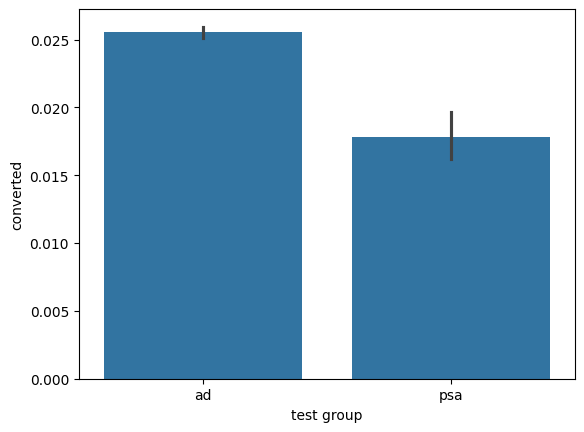

In [18]:
#Conversion Rate by test group
conversion_by_group = data.groupby('test group')['converted'].mean()
print(conversion_by_group)

sns.barplot(x = 'test group', y = 'converted', data = data)




most ads day
Friday       0.022212
Monday       0.032812
Saturday     0.021051
Sunday       0.024476
Thursday     0.021571
Tuesday      0.029840
Wednesday    0.024942
Name: converted, dtype: float64


<Axes: xlabel='most ads day', ylabel='converted'>

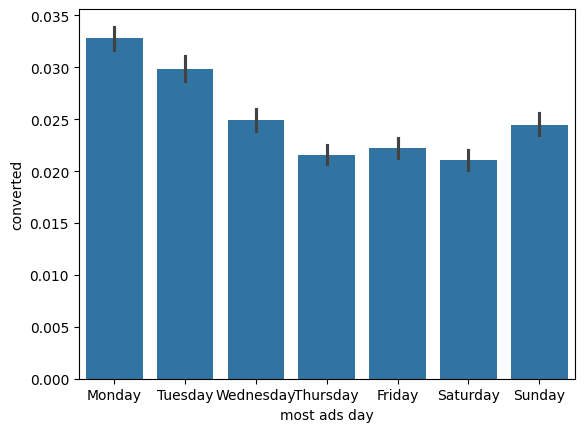

In [19]:
conversion_by_day = data.groupby('most ads day')['converted'].mean()
print(conversion_by_day)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = 'most ads day', y = 'converted', data = data, order = days_order)


In [20]:
data['converted']= data['converted'].replace({True:1, False:0}).astype('int64')

C:\Users\65815\AppData\Local\Temp\ipykernel_16536\4035490405.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['converted']= data['converted'].replace({True:1, False:0}).astype('int64')


In [21]:
alpha = 0.05
delta = 0.005

In [22]:
data_encoded = pd.get_dummies(data, columns=['test group'], prefix='test_group', drop_first=False)

# Change the data types of the new, one-hot encoded columns to integers again
data_encoded['test_group_ad'] = data_encoded['test_group_ad'].astype(int)
data_encoded['test_group_psa'] = data_encoded['test_group_psa'].astype(int)


In [23]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14


In [24]:
data_encoded.head()


,Unnamed: 0,user id,converted,total ads,most ads day,most ads hour,test_group_ad,test_group_psa
0,0,1069124,0,130,Monday,20,1,0
1,1,1119715,0,93,Tuesday,22,1,0
2,2,1144181,0,21,Tuesday,18,1,0
3,3,1435133,0,355,Tuesday,10,1,0
4,4,1015700,0,276,Friday,14,1,0


In [25]:
X_exp = data_encoded[data_encoded['converted'] == 1]['test_group_ad'].sum()
X_con = data_encoded[data_encoded['converted'] == 1]['test_group_psa'].sum()

n_exp = data_encoded['test_group_ad'].sum()
n_con = data_encoded['test_group_psa'].sum()

print('# of users who saw Ads:',n_exp,'\n', 'Ad conversions:', X_exp,'\n', '# of users who saw PSA:', n_con, '\n', 'PSA conversions:', X_con)


# of users who saw Ads: 564577 
 Ad conversions: 14423 
 # of users who saw PSA: 23524 
 PSA conversions: 420


In [26]:
# Compute probability of conversion per group.
p_con_hat = round((X_exp/n_exp), 2)
p_exp_hat = round((X_con/n_con), 2)

print("Probability of conversion through Ads:", p_exp_hat)
print("Probability of conversion through PSAs: ", p_con_hat)

# Compute pooled probability of conversion, including both marketing strategies.
p_pooled_hat = round((X_exp + X_con) / (n_exp + n_con), 2)

print("Pooled probability of conversion:", p_pooled_hat)

Probability of conversion through Ads: 0.02
Probability of conversion through PSAs:  0.03
Pooled probability of conversion: 0.03


In [28]:
from scipy.stats import norm

# Finding the Standard Error
SE = np.sqrt(variance)
print("The Standard Error is ", SE)

# Calculating test stat of a 2 - sample Z-test with our SE
test_stat = (p_exp_hat - p_con_hat) / SE
print("Our test stat is ", test_stat)

# Using the test stat to compute the critical value of the Z-test
Z_crit = norm.ppf(1-alpha/2)
print("The critical z-value from Standard Normal Distribution is ", Z_crit)

NameError: name 'variance' is not defined

In [65]:
p_value = 2*(1-norm.cdf(abs(z_score)))
print('P-value:', p_value)


P-value: 1.7053025658242404e-13


In [66]:
CI = [
    round((p_con_hat - p_exp_hat) - SE * Z_crit, 3),
    round((p_con_hat - p_exp_hat) + SE * Z_crit, 3)
]

print("The confidence Interval for this test is ", CI)


The confidence Interval for this test is  [np.float64(0.008), np.float64(0.012)]


In [68]:
# Calculating lower and upper bound of the Confidence Interval
CI = [
    round((p_con_hat - p_exp_hat) - SE * Z_crit, 3),
    round((p_con_hat - p_exp_hat) + SE * Z_crit, 3)
]

print("The confidence Interval for this test is ", CI)

#Function to test for practical signifance
def pract_significance (delta,CI):
    # Get lower bound of the CI
    lower_bound = CI[0]

    #Check if lower bound is greater than or equal to the MDE we defined when first designing the A/B test
    if lower_bound >= delta:
        print(f"The difference between the Ad and PSA marketing strategies are practically significant with an MDE of {delta}!")
        return True
    else:
        print(f"There is no practically significance in the difference between the Ad and PSA marketing strategies when testing for an increase of {delta*100}%.")
        return False

pract_significance (delta,CI)

The confidence Interval for this test is  [np.float64(0.008), np.float64(0.012)]
The difference between the Ad and PSA marketing strategies are practically significant with an MDE of 0.005!


True